In [74]:
# Basic precode setup of importing all the libraries, such as MatPlotlib for plotting, Seaborn to make it look nicer
# Numpy for the math tools as well as the widgets class from MatPlotLib for the slider tools
%matplotlib notebook
import matplotlib
from matplotlib.widgets import Slider
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="ticks")

This is an interactive tool to show the effects of visually on how bracketing method as well as false position method works.
This serves to give user an better intuitive understanding of how it works to hopefully better understand the reason of why we are learning it in Numerical Analysis


$$ \textbf{Below is the "settings" to which you can adjust, all of which are commented} $$

By default setting, we have the x-axis starting from 1, and end at 30 split evenly by 1000 spaces.
Moreover the equation showcased here is:


$$  f(c) = \left(\frac{gm}{c}\right)\times\left(1-e^{-\frac{c}{m}t}\right)-v $$ 

some premade equation that is commented our is also available which are :

$$ f(x) = 3cos(x) + 5sin(x)$$

$$ f(x) =  3x^2 -25x-2$$

Free feel to change anything you want like the boundaries and etc

In [103]:
# This is the x limit, so starting my x from 1 to 30, the reason i start from 1 is because with the equation if i put 0 it becomes undefined
x = np.linspace(0, 10 ,1000)

# This is a function to compute your equation 
#like f(x) = x^2 , so this equation used takes in x and outputs f based on the equation of the parachutist

# def equationf(x):
	g = 9.81
	m = 68.1
	t = 10
	v = 40
	f = ((g*m)/x)*(1-np.exp(-(x/m)*t))-v
	return f

# Another example equation f(x) = 3cos x + 5sin x , for sine, cosine, exponential you have to put np. Like np.cos(x), np.exp(x)
#     f = 3*(np.cos(x)) +5(np.sin(x))
#     return f

# Another one for f(X) = 3x^2 - 25x -2
# def equationf(x):
#     f = 3*x**2 - 25*x - 2
#     return f

###################
# The upper and lower limit we use
lower = 10
upper = 1
######################3

$$ \textbf{False Position Method}$$


Below is the code for doing the Flase Position Method, running it will show the plot of the thing as well as slider to do the iteration

<IPython.core.display.Javascript object>


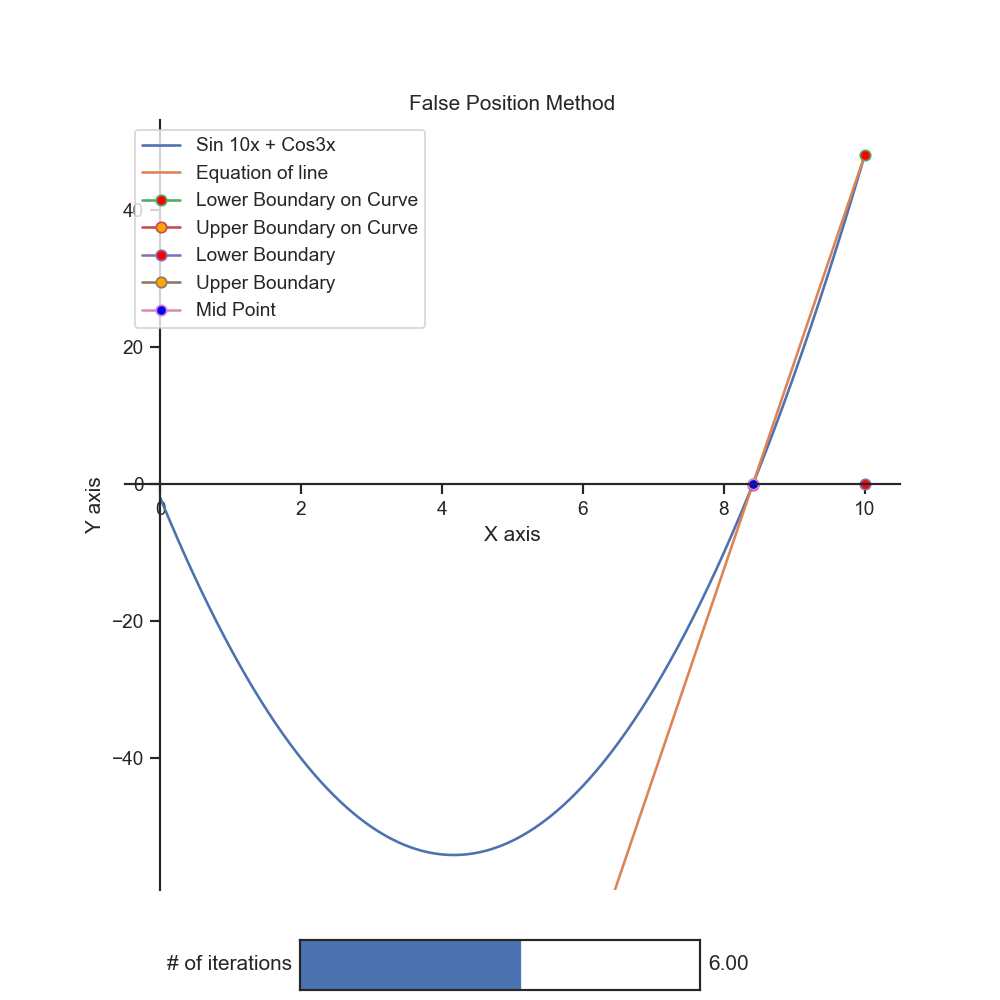

In [106]:
# Plotting settings
# Figure is the "window" of the plot, with size 8 and 8, what is the unit? idk i just change until its nice
fig= plt.figure(figsize=(8,8))

# ax or axes in matlab term is the "plot" or "image" in the figure, so you can have a figure with 8 plots called axes (different from axis)
ax = plt.subplot()


# Spines in matlab term pretty much means like "edge line" or "axis lines" of the plot, so like the "top line, bottom like etc"
#I made the top and right line invisible so we will only have 2 lines which will be the x and y axis
# i set the position of the line to be at 0,0 cuz origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# our boundaries

xlower = lower
xupper = upper

#This time i want to plot the equation of like so Y = mX + C , where m is gradient and C is y-intercept

# finding y1, and y2 so that i can use to find gradient
y1 = equationf(xlower) # f(Xl)
y2 = equationf(xupper) # f(Xu)

# Finding the gradient here
m = (y1-y2)/(xlower-xupper) # gradient

# Finds the Y-intercept C based on the equation (y1-y2) = m(x1-x2)
# So expanding that equation will get y1 -y2 = m*x1 - m*x2
# Since its y- intercept, x1 = 0
#  y1 = -m*x2 - y2

# Since formula for c from Y = mX + c when X =0 is C = Y
# Therefore C = y1 = -m*X2 - y2
# Math in programming


C = -m*xupper + y2
y = m*x + C # Equation of line


# This is the Xr equation from the notes, is derived from the gradient formula
xmid = xupper - (equationf(xupper)*(xlower-xupper))/(equationf(xlower)-equationf(xupper))

# Main Equation Line
line1, = plt.plot(x,equationf(x) ,label="Sin 10x + Cos3x")

# This plots the equation of line between the 2 points,
lineeqn, = plt.plot(x, y, label = "Equation of line")

# This plots the XL and Xu point but show them with respect to on the curve so you can see it better
lowerpointoncurve,= plt.plot(xlower, equationf(xlower), label="Lower Boundary on Curve",marker='o', markerfacecolor='red', markersize=6)
upperpointoncurve, = plt.plot(upper, equationf(upper), label="Upper Boundary on Curve",marker='o', markerfacecolor='orange', markersize=6)

# The usual 3 big boi points
lowerpoint,= plt.plot(xlower, 0, label="Lower Boundary",marker='o', markerfacecolor='red', markersize=6)
upperpoint, = plt.plot(xupper, 0, label="Upper Boundary", marker='o', markerfacecolor='orange', markersize=6)
midpoint, = plt.plot(xmid, 0, label="Mid Point", marker='o', markerfacecolor='blue', markersize=6)



# Labels the axis, title and show the legend
plt.title("False Position Method")
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.legend()




# slider functionality
# This create the slider axe, (again remember that an axe is pretty much like a "plot" or "image" on a figure)
# The first 2 numbers are like the where the left and bottom part of the slider starts, so 0.1 and 0.01 so its pretty low
# the last 2 numer is the width and height of the slider
axSlider1 = plt.axes([0.3,0.01,0.4, 0.05])

# this line will turn the axe into an actual slider instead of a blank "plot" or image"
# If you want to icnrease the total number of iteration available change valmax
iterationSlider = Slider(axSlider1, "# of iterations", valmin = 1, valmax = 10, valinit = 1, valstep = 1)



# This is the function that the slider will use when you change the slider value, will be explained later
# What this function do is like what you read in the textbook the f(xl)*f(xu) < 0 and blah blah rule



def newPoint(val):
    iteration = int(iterationSlider.val)
    xlownew = lower
    xupnew = upper
    xmid = xupnew - (equationf(xupnew)*(xlownew-xupnew))/(equationf(xlownew)-equationf(xupnew))

    y1new = equationf(xlownew)
    y2new = equationf(xupnew)

    m = (y1new-y2new)/(xlownew-xupnew) 
    C = -m*xupnew + y2new
    y = m*x + C # Equation of line
    
    
    # Based on the # of iteration you choose, this will do the condition process n times
    # so if you choose 2 iterations, it does the calculation 2 times
    for i in range(1,iteration):
        
        # This is the f(xl)*f(xu) condition checker from the textbook
        check = equationf(xlownew)*equationf(xmid)
        
        # this is condition one from the notes, if f(xl)*f(xu)  > 0, set your Xl = Xr
        if check>0:
            print(f"f(Xl)*f(Xr) = {check} > 0,")
            
            # Based on condition, change Xl, and update everything
            xlownew = xmid
            
            # New value of y1 and y2 for gradient and xr calc
            y1new = equationf(xlownew)
            y2new = equationf(xupnew)

            # calculate new Xr value
            xmid = xupnew - (y2new*(xlownew-xupnew))/(y1new-y2new)
            
            # Calculates new values of C and M to make new equation of line
            m = (y1new-y2new)/(xlownew-xupnew)
            C = -m*xupnew + y2new
            y = m*x + C 
        
        # this is condition one from the notes, if f(xl)*f(xu)  < 0, set your Xu = Xr
        elif check<0:
            
            print(f"f(Xl)*f(Xr) = {check} < 0,")
            
            # Based on condition, change Xl, and update everything
            xupnew = xmid
            
            # New value of y1 and y2 for gradient and xr calc
            y1new = equationf(xlownew)
            y2new = equationf(xupnew)
            xmid =  xupnew - (y2new*(xlownew-xupnew))/(y1new-y2new)
            
            # calculate new Xr value
            m = (y1new-y2new)/(xlownew-xupnew)
            C = -m*xupnew + y2new
            y = m*x + C 
    
    # Once everything is done, update the points with the new x values 
    lowerpoint.set_xdata(xlownew)
    upperpoint.set_xdata(xupnew)
    midpoint.set_xdata(xmid)

    # Same thing update the x and y values of the new points
    lowerpointoncurve.set_xdata(xlownew)
    lowerpointoncurve.set_ydata(y1new)
    upperpointoncurve.set_xdata(xupnew)
    upperpointoncurve.set_ydata(y2new)

    # Update the equation of line with the new equation
    lineeqn.set_ydata(y)
    # Redraw everything
    plt.draw()



# So iterationSlider is what i call my slider object, and the .on_changed() will be what the slider will do when it changed
# the format is like this   sliderName.on_changed(Functiontocall)
# Meaning when i change my slider values, so when it changes, it calls the function newPoint() that i did.
iterationSlider.on_changed(newPoint)

# Finally show all the things, plot, sliders, and etc
plt.show()




$$ \textbf{Bracketing Method}$$
Below is the code for the bracketing method of analysis, running it will show the graph as well as the slider to see the effect

<IPython.core.display.Javascript object>


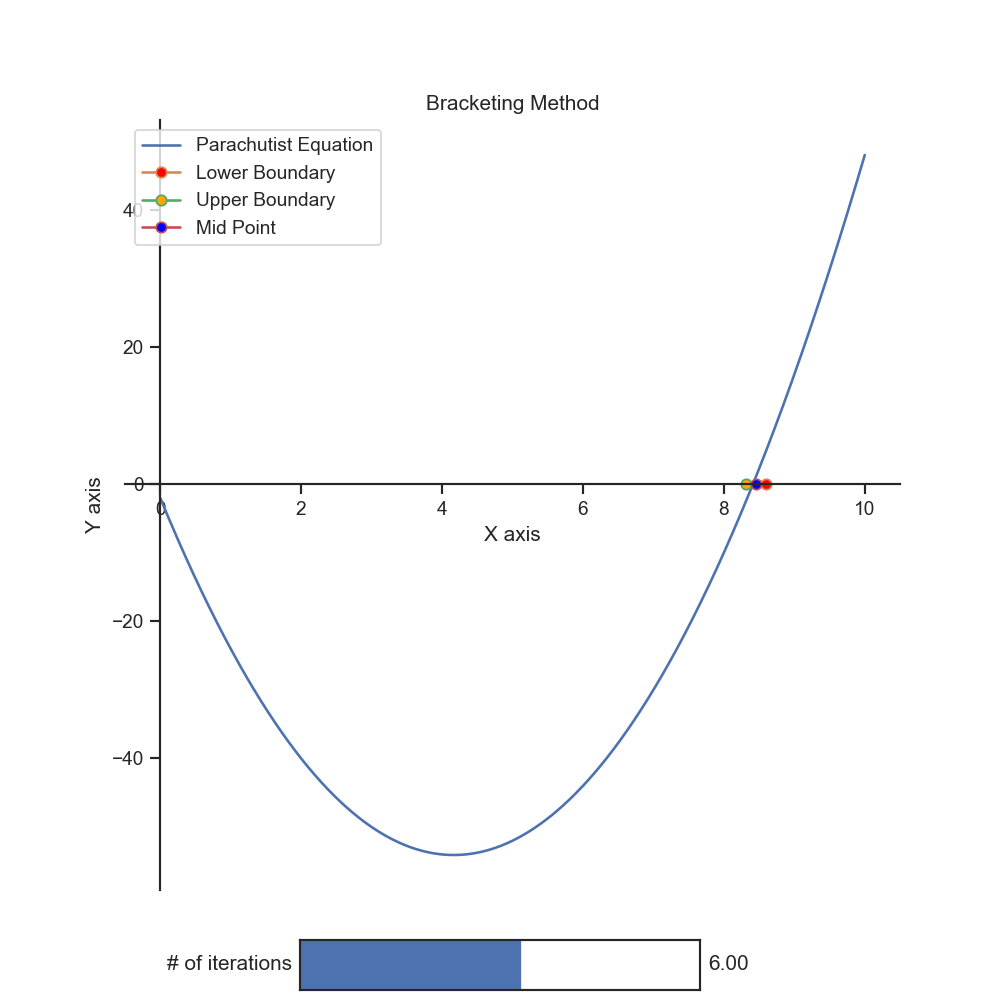

In [105]:

# Plotting settings
# Figure is the "window" of the plot, with size 8 and 8, what is the unit? idk i just change until its nice
fig= plt.figure(figsize=(8,8))

# ax or axes in matlab term is the "plot" or "image" in the figure, so you can have a figure with 8 plots called axes (different from axis)
ax = plt.subplot()


# Spines in matlab term pretty much means like "edge line" or "axis lines" of the plot, so like the "top line, bottom like etc"
#I made the top and right line invisible so we will only have 2 lines which will be the x and y axis
# i set the position of the line to be at 0,0 cuz origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)





# Plots the equation and names the thing "line1" for coding variable, 
# format of code is plt.plot( x, y, label= "bla blah blah" , color = " blah blah blah" ) etc

xlower = lower
xupper = upper
xmid = (xupper + xlower)/2


# Plots the equation and points and names the thing "line1, lowerpoint and etc" for coding variable, 
# format of code is plt.plot( x, y, label= "bla blah blah" , color = " blah blah blah" ) etc


line1, = plt.plot(x,equationf(x) ,label="Parachutist Equation")
lowerpoint,= plt.plot(xlower, 0, label="Lower Boundary",marker='o', markerfacecolor='red', markersize=6)
upperpoint, = plt.plot(xupper, 0, label="Upper Boundary", marker='o', markerfacecolor='orange', markersize=6)
midpoint, = plt.plot(xmid, 0, label="Mid Point", marker='o', markerfacecolor='blue', markersize=6)




# Labels the axis, title and show the legend
plt.title("Bracketing Method")
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.legend()



# slider functionality
# This create the slider axe, (again remember that an axe is pretty much like a "plot" or "image" on a figure)
# The first 2 numbers are like the where the left and bottom part of the slider starts, so 0.1 and 0.01 so its pretty low
# the last 2 numer is the width and height of the slider

axSlider1 = plt.axes([0.3,0.01,0.4, 0.05])

# this line will turn the axe into an actual slider instead of a blank "plot" or image"
iterationSlider = Slider(axSlider1, "# of iterations", valmin = 1, valmax = 10, valinit = 1, valstep = 1)



# This is the function that the slider will use when you change the slider value, will be explained later
# What this function do is like what you read in the textbook the f(xl)*f(xu) < 0 and blah blah rule


def newPoint(val):
    #Sets the iteration value as whatever the value you set the slider at
    iteration = int(iterationSlider.val)
    
    # Creates local variable that is used in the function only
    xlower = lower
    xupper = upper
    xmid = (xlower+xupper)/2
    
    
    # Based on the # of iteration you choose, this will do the condition process n times
    # so if you choose 2 iterations, it does the calculation 2 times
    for i in range(1,iteration):
        # This is the f(xl)*f(xu) equation, so i put that value as check
        check = equationf(xlower)*equationf(xmid)
        
        # this is condition one from the notes, if f(xl)*f(xu)  > 0, set your Xl = Xr
        if check>0:
            # This print is for me to check the values to make sure everything makes sense
            print(f"f(Xl)*f(Xr) = {check} > 0")
            
            # Applying the condition
            xlower = xmid
                  
            # calculate new value of mid
            xmid = (xupper + xlower)/2
        # This one is if f(xl)*f(xu)  < 0, so Xu = Xr
        elif check<0:
            print(f"f(Xl)*f(Xr) = {check} < 0")
            
            # turning Xu = Xr      
            xupper = xmid
            # Calculate new value
            xmid = (xupper + xlower)/2

    # After everything is done, update the values of Xu, Xr and stuff to all the plots
    # Like updating the x coordinate for the lower point, mid point and etc
    lowerpoint.set_xdata(xlower)
    upperpoint.set_xdata(xupper)
    midpoint.set_xdata(xmid)
    # Draw the plot again
    plt.draw()


# So iterationSlider is what i call my slider object, and the .on_changed() will be what the slider will do when it changed
# the format is like this   sliderName.on_changed(Functiontocall)
# Meaning when i change my slider values, so when it changes, it calls the function newPoint() that i did.
iterationSlider.on_changed(newPoint)

# Finally show all the things, plot, sliders, and etc
plt.show()
